# CREDIT EDA ASSIGNMENT

**Problem Statement - Understand the working structure of Banking financial service, How bank approve, deny the loan to the customer by applying EDA Techniques. Find out patterns, graphs and observe how banks minimise the risk of losing money while lending to customers.**

 

**1. ANALYSIS ON APPLICATION DATASET**
>1.1 Importing Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from plotly import tools
import plotly.express as pex
%matplotlib inline
pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',200)


> 1.2 Loading Data Sets

In [6]:
app_data_df = pd.read_csv("application_data.csv")

In [7]:
pre_app_data = pd.read_csv("previous_application.csv")

In [8]:
column_dict = pd.read_csv("columns_description (1).csv", encoding= "cp1252")

> 1.3 Data Inspection

In [11]:
app_data_df = pd.read_csv("application_data.csv")
app_data_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [12]:
app_data_df.shape

(307511, 122)

In [13]:
app_data_df.size

37516342

In [14]:
app_data_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [15]:
app_data_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [16]:
app_data_df.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [17]:
app_data_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [18]:
app_data_df.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [19]:
#Lets find the % of missing value in each column
(app_data_df.isnull().mean()*100).sort_values(ascending = False)


COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

**2. DEALING WITH NULL VALUES**

In [20]:
#lets drop all the columns with more than 50% null values and keeping columns with <50% missing values
app_data_df = app_data_df.loc[:, app_data_df.isnull().mean()<=0.5]

In [21]:
app_data_df.shape

(307511, 81)

In [22]:
#Lets find the columns with <=13% null values
list(app_data_df.columns[(app_data_df.isnull().mean()<=0.13) & (app_data_df.isnull().mean()>0)])


['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE']

**2.1 Imputation On Columns**

**Column 1 :** AMT_ANNUITY

In [23]:
app_data_df["AMT_ANNUITY"].value_counts()

9000.0      6385
13500.0     5514
6750.0      2279
10125.0     2035
37800.0     1602
            ... 
79902.0        1
106969.5       1
60885.0        1
59661.0        1
77809.5        1
Name: AMT_ANNUITY, Length: 13672, dtype: int64

C:\Users\Win-10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



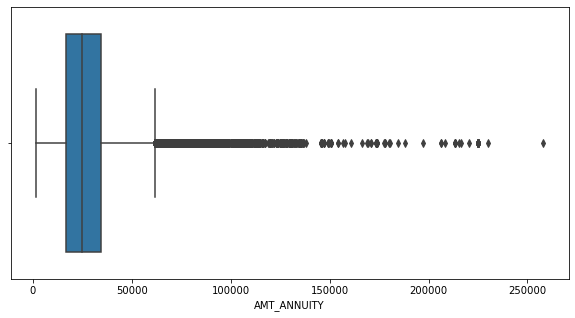

In [24]:
plt.figure(figsize=[10,5])
sns.boxplot(app_data_df["AMT_ANNUITY"])
plt.show()


In [25]:
#AMT_ANNUITY is a numercal variable and it has outliers, lets find mean, median and mode
imputation = round(app_data_df['AMT_ANNUITY'].mean(),2)
imputation

27108.57

In [26]:
imputation = round(app_data_df['AMT_ANNUITY'].median(),2)
imputation

24903.0

In [27]:
imputation = round(app_data_df['AMT_ANNUITY'].mode(),2)
imputation

0    9000.0
dtype: float64

**Since AMT_ANNUITY has outliers so this column can be imputed using median of the column : 24903**

**Column 2 :** AMT_GOODS_PRICE

C:\Users\Win-10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



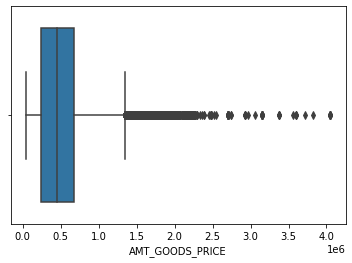

In [28]:
sns.boxplot(app_data_df["AMT_GOODS_PRICE"])
plt.show()

In [29]:
#AMT_ANNUITY is a numercal variable and it has outliers, lets find mean, median and mode
imputation = round(app_data_df['AMT_GOODS_PRICE'].mean(),2)
imputation

538396.21

In [30]:
imputation = round(app_data_df['AMT_GOODS_PRICE'].median(),2)
imputation

450000.0

In [31]:
imputation = round(app_data_df['AMT_GOODS_PRICE'].mode(),2)
imputation

0    450000.0
dtype: float64

**Since AMT_GOOD_PRICE has outliers & this column can be imputed using median of the column : 450000**

**Column 3:** NAME_TYPE_SUITE

In [32]:
app_data_df["NAME_TYPE_SUITE"].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [33]:
#NAME_TYPE_SUITE is a Categorical variable, lets find its mode
imputation = app_data_df['NAME_TYPE_SUITE'].mode()
imputation

0    Unaccompanied
dtype: object

**NAME_TYPE_SUITE is a categorical variable so this column can be imputed using mode of the column : Unaccompanied**

**Column 4:** CNT_FAM_MEMBERS 

In [34]:
app_data_df["CNT_FAM_MEMBERS"].value_counts()

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
12.0         2
20.0         2
16.0         2
13.0         1
15.0         1
11.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

C:\Users\Win-10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



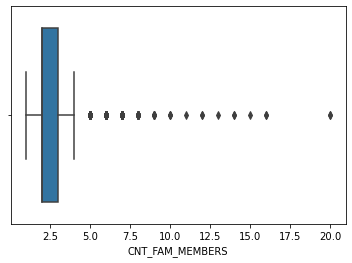

In [35]:
sns.boxplot(app_data_df['CNT_FAM_MEMBERS'])
plt.show()

In [36]:
#CNT_FAM_MEMBERS is a numerical variable and it has outliers lets find mean,median and mode of the column
imputation = round(app_data_df["CNT_FAM_MEMBERS"].mean(),2)
imputation

2.15

In [37]:
imputation = round(app_data_df["CNT_FAM_MEMBERS"].median(),2)
imputation

2.0

In [38]:
imputation = round(app_data_df["CNT_FAM_MEMBERS"].mode(),2)
imputation

0    2.0
dtype: float64

**CNT_FAM_MEMBERS has outliers, the column can be imputed using the median of the column : 2.0**


**Column 5:** EXT_SOURCE_2

In [39]:
app_data_df["EXT_SOURCE_2"].value_counts()

0.285898    721
0.262258    417
0.265256    343
0.159679    322
0.265312    306
           ... 
0.004725      1
0.257313      1
0.282030      1
0.181540      1
0.267834      1
Name: EXT_SOURCE_2, Length: 119831, dtype: int64

C:\Users\Win-10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



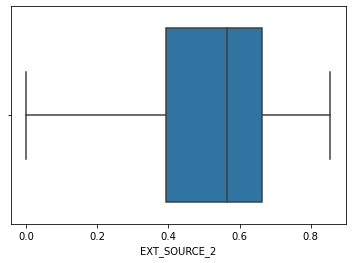

In [40]:
sns.boxplot(app_data_df["EXT_SOURCE_2"])
plt.show()

In [41]:
#EXT_SOURCE_2 is a numerical variable and it has no outliers, Let's find mean, median and mode of the column
imputation = round(app_data_df["EXT_SOURCE_2"].mean(),2)
imputation

0.51

In [42]:
imputation = round(app_data_df["EXT_SOURCE_2"].median(),2)
imputation

0.57

In [43]:
imputation = round(app_data_df["EXT_SOURCE_2"].mode(),2)
imputation

0    0.29
dtype: float64

**EXT_SOURCE_2 has no outliers hence we imputed this column with mean : 0.51**

**3. DEALING WITH COLUMN DATATYPES AND ERRORS**

In [44]:
app_data_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

In [45]:
app_data_df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOOR

In [46]:
#Lets find The columns starting with 'DAYS'
Days_col = [col for col in app_data_df if col.startswith('DAYS')]
Days_col

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [47]:
#Lets Check the values present in columns starting with 'DAYS'
print(app_data_df['DAYS_BIRTH'].unique())
print(app_data_df['DAYS_EMPLOYED'].unique())
print(app_data_df['DAYS_REGISTRATION'].unique())
print(app_data_df['DAYS_ID_PUBLISH'].unique())
print(app_data_df['DAYS_LAST_PHONE_CHANGE'].unique())


[ -9461 -16765 -19046 ...  -7951  -7857 -25061]
[  -637  -1188   -225 ... -12971 -11084  -8694]
[ -3648.  -1186.  -4260. ... -16396. -14558. -14798.]
[-2120  -291 -2531 ... -6194 -5854 -6211]
[-1134.  -828.  -815. ... -3988. -3899. -3538.]


In [48]:
#Let's convert the negative values into positive values in DAYS Column
app_data_df[Days_col] = abs(app_data_df[Days_col])

In [49]:
print(app_data_df['DAYS_BIRTH'].unique())
print(app_data_df['DAYS_EMPLOYED'].unique())
print(app_data_df['DAYS_REGISTRATION'].unique())
print(app_data_df['DAYS_ID_PUBLISH'].unique())
print(app_data_df['DAYS_LAST_PHONE_CHANGE'].unique())


[ 9461 16765 19046 ...  7951  7857 25061]
[  637  1188   225 ... 12971 11084  8694]
[ 3648.  1186.  4260. ... 16396. 14558. 14798.]
[2120  291 2531 ... 6194 5854 6211]
[1134.  828.  815. ... 3988. 3899. 3538.]


In [50]:
app_data_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.068510e+05,246546.000000,157504.000000,154491.000000,157504.000000,154491.000000,157504.000000,154491.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,16036.995067,67724.742149,4986.120328,2994.202373,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,5.143927e-01,0.510853,0.977735,0.226282,0.977065,0.222315,0.977752,0.225897,0.102547,1.422245,0.143421,1.405292,0.100049,962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,139443.751806,3522.886321,1509.450419,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,1.910602e-01,0.194844,0.059223,0.144641,0.064575,0.143709,0.059897,0.145067,0.107462,2.400989,0.446698,2.379803,0.362291,826.808487,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,7489.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

**3.1 Removing XNA Values from the Columns**

In [51]:
app_data_df["CODE_GENDER"].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [52]:
# Replacing XNA value with F
app_data_df.loc[app_data_df["CODE_GENDER"] == 'XNA','CODE_GENDER'] = 'F'

In [53]:
app_data_df["CODE_GENDER"].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

**3.2 Replacing XNA values with NaN**


In [54]:
app_data_df.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [55]:
app_data_df = app_data_df.replace('XNA',np.NaN)

In [56]:
app_data_df.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3          1187
Industry

**3.3 Converting DAYS_BIRTH into Years**

In [57]:
app_data_df["DAYS_BIRTH"] = (app_data_df["DAYS_BIRTH"]/365).astype(int)

In [58]:
app_data_df["DAYS_BIRTH"].unique()

array([25, 45, 52, 54, 46, 37, 51, 55, 39, 27, 36, 38, 23, 35, 26, 48, 31,
       50, 40, 30, 68, 43, 28, 41, 32, 33, 47, 57, 65, 44, 64, 21, 59, 49,
       56, 62, 53, 42, 29, 67, 63, 61, 58, 60, 34, 22, 24, 66, 69, 20])

****4. ANALYSIS****

In [59]:
import plotly
from plotly import tools
import plotly.express as pex

**4.1 Reporting The Outliers**

C:\Users\Win-10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



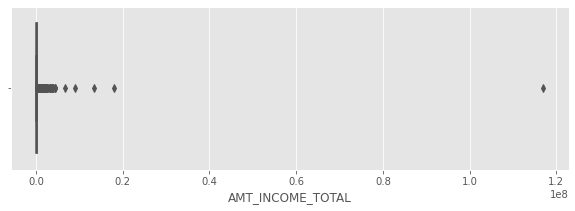

In [60]:
plt.style.use('ggplot')
plt.figure(figsize=[10,3])
sns.boxplot(app_data_df["AMT_INCOME_TOTAL"])
plt.show()

**The above boxplot showing the distribution of the total Income of the clients, here we observe an outlier value.**

C:\Users\Win-10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



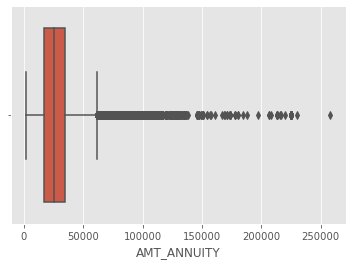

In [61]:
sns.boxplot(app_data_df["AMT_ANNUITY"])
plt.show()

****The above boxplot showing the distribution of the Annuity of the clients, here we observe an outlier value above 250k****

C:\Users\Win-10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



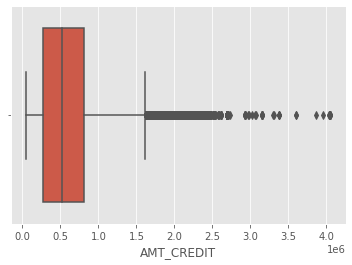

In [62]:
sns.boxplot(app_data_df["AMT_CREDIT"])
plt.show()

**The above boxplot showing the distribution of the Credit amount of the clients, there are no outliers in the plot**

C:\Users\Win-10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



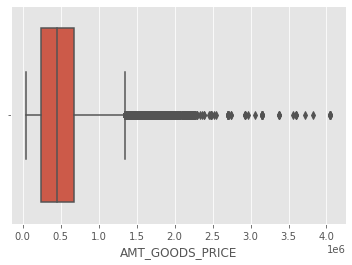

In [63]:
sns.boxplot(app_data_df["AMT_GOODS_PRICE"])
plt.show()

**The above boxplot showing the distribution of the Goods Price, here we observe an one outlier value above 4M**

C:\Users\Win-10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



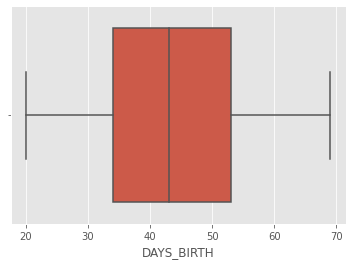

In [64]:
sns.boxplot(app_data_df["DAYS_BIRTH"])
plt.show()

**The above boxplot showing that there is no outliers in the DAYS_BIRTH column**

**4.2 Binning On Numerical Variables**

In [65]:
app_data_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,52,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,52,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,54,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
#Let's Binning AMT_INCOME based on quantiles
app_data_df["AMT_INCOME_BIN"] = pd.qcut(app_data_df.AMT_INCOME_TOTAL, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['Very Poor', 'Poor', "Middle Class", 'Rich', 'Super Rich'])
app_data_df["AMT_INCOME_BIN"].head(10)

0    Middle Class
1            Rich
2       Very Poor
3            Poor
4            Poor
5       Very Poor
6    Middle Class
7      Super Rich
8            Poor
9            Poor
Name: AMT_INCOME_BIN, dtype: category
Categories (5, object): ['Very Poor' < 'Poor' < 'Middle Class' < 'Rich' < 'Super Rich']

In [67]:
#Let's Binning AMT_ANNUITY based on quantiles
app_data_df["AMT_ANNUITY_BIN"] = pd.qcut(app_data_df.AMT_INCOME_TOTAL, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['Very Low', 'Low', "Medium", 'High', 'Very High'])
app_data_df["AMT_ANNUITY_BIN"].head(10)

0       Medium
1         High
2     Very Low
3          Low
4          Low
5     Very Low
6       Medium
7    Very High
8          Low
9          Low
Name: AMT_ANNUITY_BIN, dtype: category
Categories (5, object): ['Very Low' < 'Low' < 'Medium' < 'High' < 'Very High']

In [68]:
#Let's Binning AMT_CREDIT based on quantiles
app_data_df["AMT_CREDIT_BIN"] = pd.qcut(app_data_df.AMT_INCOME_TOTAL, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['Very Low', 'Low', "Medium", 'High', 'Very High'])
app_data_df["AMT_CREDIT_BIN"].head(10)

0       Medium
1         High
2     Very Low
3          Low
4          Low
5     Very Low
6       Medium
7    Very High
8          Low
9          Low
Name: AMT_CREDIT_BIN, dtype: category
Categories (5, object): ['Very Low' < 'Low' < 'Medium' < 'High' < 'Very High']

In [69]:
#Let's Bining DAYS_BIRTH variable based on the various age categories
app_data_df['DAYS_BIRTH_BINS']=pd.cut(app_data_df['DAYS_BIRTH'], bins=[20,30,40,60,100], labels=["Youth", "Young", "Middle-Age", "Old-Age"])
app_data_df['DAYS_BIRTH_BINS'].head()


0         Youth
1    Middle-Age
2    Middle-Age
3    Middle-Age
4    Middle-Age
Name: DAYS_BIRTH_BINS, dtype: category
Categories (4, object): ['Youth' < 'Young' < 'Middle-Age' < 'Old-Age']

In [70]:
app_data_df['DAYS_BIRTH_BINS'].value_counts()


Middle-Age    142220
Young          83117
Youth          52805
Old-Age        29368
Name: DAYS_BIRTH_BINS, dtype: int64

In [71]:
#Let's Binning AMT_CREDIT based on quantiles
app_data_df["AMT_GOODS_PRICE_BIN"] = pd.qcut(app_data_df.AMT_GOODS_PRICE, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['Very Low', 'Low', "Medium", 'High', 'Very High'])
app_data_df["AMT_GOODS_PRICE_BIN"].head(10)

0          Low
1         High
2     Very Low
3          Low
4       Medium
5       Medium
6    Very High
7    Very High
8         High
9          Low
Name: AMT_GOODS_PRICE_BIN, dtype: category
Categories (5, object): ['Very Low' < 'Low' < 'Medium' < 'High' < 'Very High']

**4.3 Checking Imbalance % On TARGET Variable**

In [72]:
#Let's find the % imbalance on 'TARGET' Variable

imbalance = app_data_df["TARGET"].value_counts()
imbalance

0    282686
1     24825
Name: TARGET, dtype: int64

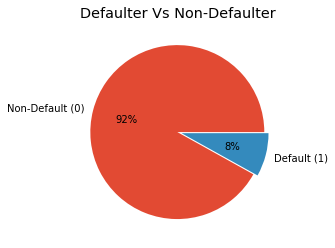

In [73]:
plt.pie(app_data_df["TARGET"].value_counts(normalize=True)*100, labels=["Non-Default (0)", "Default (1)"],explode=(0,0.05), autopct= "%1.f%%")
plt.title("Defaulter Vs Non-Defaulter")
plt.show()

**The above pie chart clearly shows that, there is high imbalance between two TARGET variables,
for Non-Defaulters it is 92% & for Defaulters it is 8% only**

**5. DIVIDING DATASET INTO TWO SETS**

In [74]:
New_df1 = app_data_df.loc[app_data_df["TARGET"]== 1]
New_df0 = app_data_df.loc[app_data_df["TARGET"]== 0]


**6. UNIVARIATE ANALYSIS**
> 6.1 Categorical Varibales

In [75]:
#"CODE GENDER"

df0 = New_df0["TARGET"].value_counts()
df0

0    282686
Name: TARGET, dtype: int64

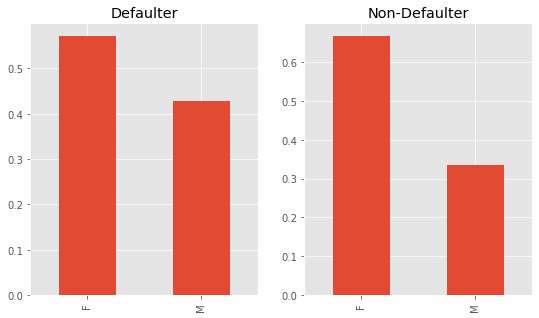

In [76]:
plt.figure(figsize=[9,5])

plt.subplot(1,2,1)
plt.title("Defaulter")
New_df1["CODE_GENDER"].value_counts(normalize=True).plot.bar()

plt.subplot(1,2,2)
plt.title("Non-Defaulter")
New_df0["CODE_GENDER"].value_counts(normalize=True).plot.bar()

plt.show()

**By comparing both the plots on the basis of gender, we can say Female are in majority in both the cases, Also Male % increases in Defaulter plot than Male % in Non-Defaulter plot**

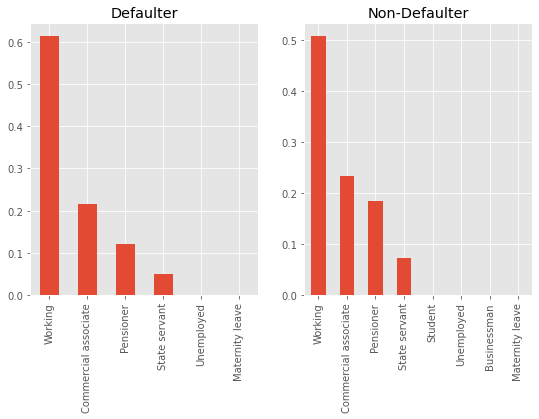

In [73]:
plt.figure(figsize=[9,5])

plt.subplot(1,2,1)
plt.title("Defaulter")
New_df1["NAME_INCOME_TYPE"].value_counts(normalize=True).plot.bar()

plt.subplot(1,2,2)
plt.title("Non-Defaulter")
New_df0["NAME_INCOME_TYPE"].value_counts(normalize=True).plot.bar()

plt.show()

**By comparing both the plots on the basis of Income Type, we can say % Non-Defaulter decrease for who are working also the % of Non-Defaulter increases for Pensioners**

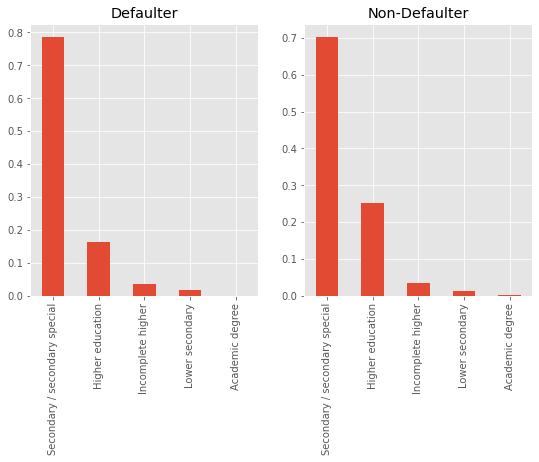

In [74]:
plt.figure(figsize=[9,5])

plt.subplot(1,2,1)
plt.title("Defaulter")
New_df1["NAME_EDUCATION_TYPE"].value_counts(normalize=True).plot.bar()

plt.subplot(1,2,2)
plt.title("Non-Defaulter")
New_df0["NAME_EDUCATION_TYPE"].value_counts(normalize=True).plot.bar()

plt.show()

**By comparing both the plots on the basis of Education, we can say % Non-Defaulter slightly decrease for those who are completed Secondary/Secondary special education also the % of Non-Defaulter increases for who completed Higher Education**

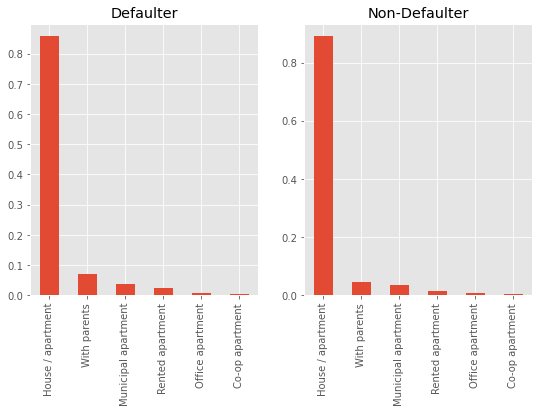

In [75]:
plt.figure(figsize=[9,5])

plt.subplot(1,2,1)
plt.title("Defaulter")
New_df1["NAME_HOUSING_TYPE"].value_counts(normalize=True).plot.bar()

plt.subplot(1,2,2)
plt.title("Non-Defaulter")
New_df0["NAME_HOUSING_TYPE"].value_counts(normalize=True).plot.bar()

plt.show()

**By comparing both the plots on the basis of Housing Type, we can say % of Non-Defaulter and Defaulter remain same for who are living in House/Apartment**

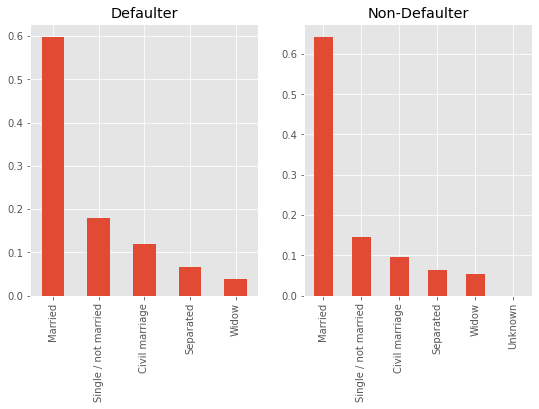

In [76]:
plt.figure(figsize=[9,5])

plt.subplot(1,2,1)
plt.title("Defaulter")
New_df1["NAME_FAMILY_STATUS"].value_counts(normalize=True).plot.bar()

plt.subplot(1,2,2)
plt.title("Non-Defaulter")
New_df0["NAME_FAMILY_STATUS"].value_counts(normalize=True).plot.bar()

plt.show()

**By comparing both the plots on the basis of Family Status, we can say % of Non-Defaulter decrease for those who are done Civil marriage also the % of Non-Defaulter increases for Married people**

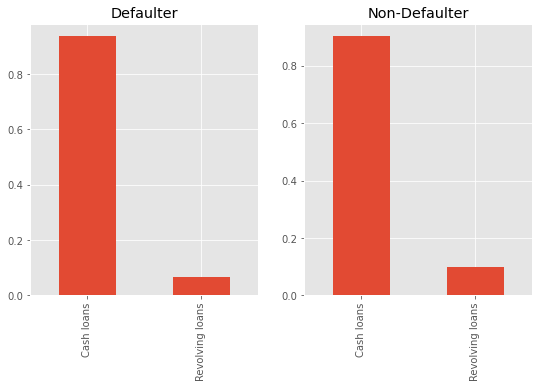

In [77]:
plt.figure(figsize=[9,5])

plt.subplot(1,2,1)
plt.title("Defaulter")
New_df1["NAME_CONTRACT_TYPE"].value_counts(normalize=True).plot.bar()

plt.subplot(1,2,2)
plt.title("Non-Defaulter")
New_df0["NAME_CONTRACT_TYPE"].value_counts(normalize=True).plot.bar()

plt.show()

**By comparing both the plots on the basis of Loan Contract Type, we can say % of Non-Defaulter and Defaulter remain same for Cash Loan Type also the % of Non-Defaulter increases for Revolving Loan**

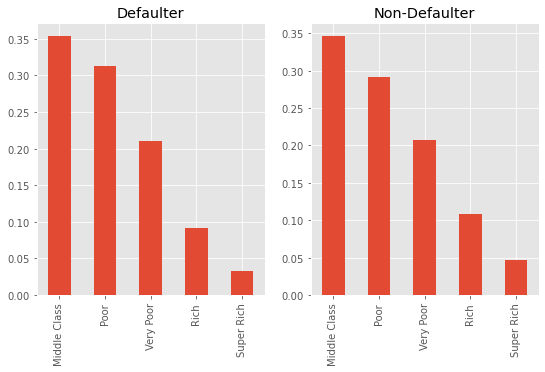

In [78]:
plt.figure(figsize=[9,5])

plt.subplot(1,2,1)
plt.title("Defaulter")
New_df1["AMT_INCOME_BIN"].value_counts(normalize=True).plot.bar()

plt.subplot(1,2,2)
plt.title("Non-Defaulter")
New_df0["AMT_INCOME_BIN"].value_counts(normalize=True).plot.bar()

plt.show()

**By comparing both the plots on the basis of Income Range, we can say % of Non-Defaulter decrease for those who are Poor people, also the % of Non-Defaulter increases for Super Rich people**

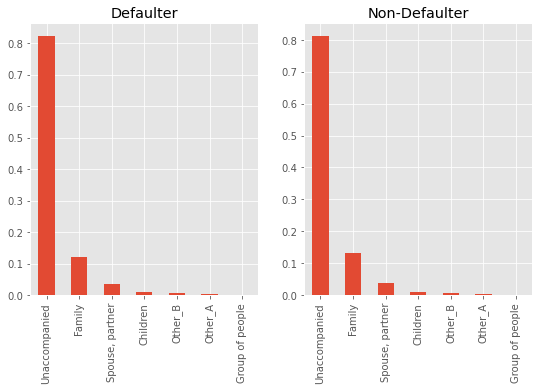

In [79]:
plt.figure(figsize=[9,5])

plt.subplot(1,2,1)
plt.title("Defaulter")
New_df1["NAME_TYPE_SUITE"].value_counts(normalize=True).plot.bar()

plt.subplot(1,2,2)
plt.title("Non-Defaulter")
New_df0["NAME_TYPE_SUITE"].value_counts(normalize=True).plot.bar()

plt.show()

**By comparing both the plots on the basis of Suite Type, we can say % of Non-Defaulter and Defaulter for all ther type remain the same.**

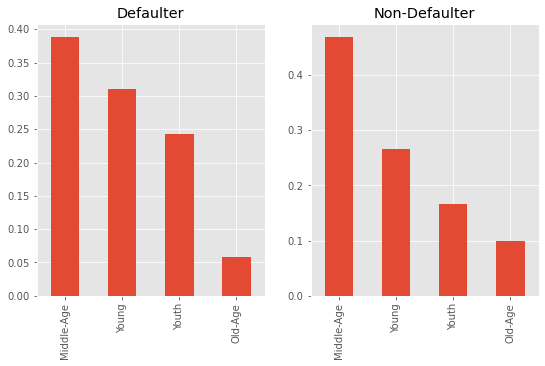

In [80]:
plt.figure(figsize=[9,5])

plt.subplot(1,2,1)
plt.title("Defaulter")
New_df1["DAYS_BIRTH_BINS"].value_counts(normalize=True).plot.bar()

plt.subplot(1,2,2)
plt.title("Non-Defaulter")
New_df0["DAYS_BIRTH_BINS"].value_counts(normalize=True).plot.bar()

plt.show()

**By comparing both the plots on the basis of Age, we can say % of Non-Defaulter decreases for Young people, also the % of Non-Defaulter increases for Middle Age people & Old age people**

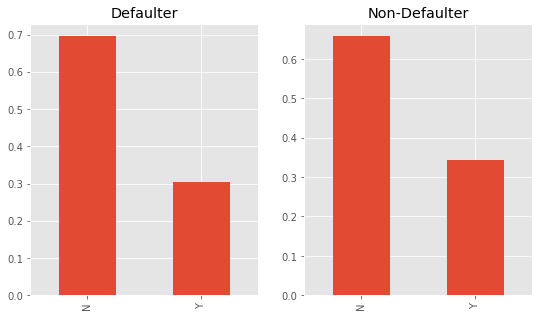

In [81]:
plt.figure(figsize=[9,5])

plt.subplot(1,2,1)
plt.title("Defaulter")
New_df1["FLAG_OWN_CAR"].value_counts(normalize=True).plot.bar()

plt.subplot(1,2,2)
plt.title("Non-Defaulter")
New_df0["FLAG_OWN_CAR"].value_counts(normalize=True).plot.bar()

plt.show()

**By comparing both the plots on the basis of Own Car, we can say % of Non-Defaulter slightly decreases for those who have No Car, also the % of Non-Defaulter increases for those people who have Own Car**

> 6.2 Numerical Variables

**Loan Annuity**

C:\Users\Win-10\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Distribution Of Defaulters\n')

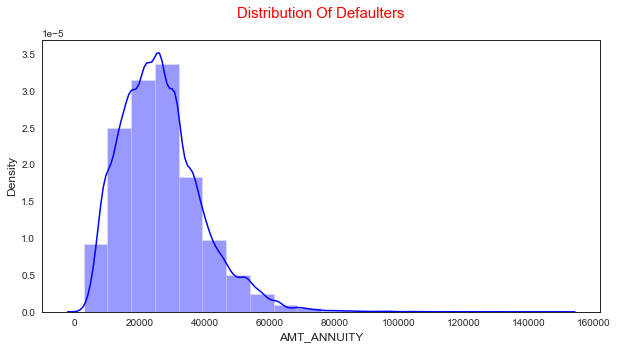

In [82]:
plt.figure(figsize=[10,5])

sns.set_style("white")
sns.distplot(New_df1["AMT_ANNUITY"], bins=20, color="blue")
plt.title("Distribution Of Defaulters\n", fontsize=15, color="red")

C:\Users\Win-10\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Distribution Of Non-Defaulters\n')

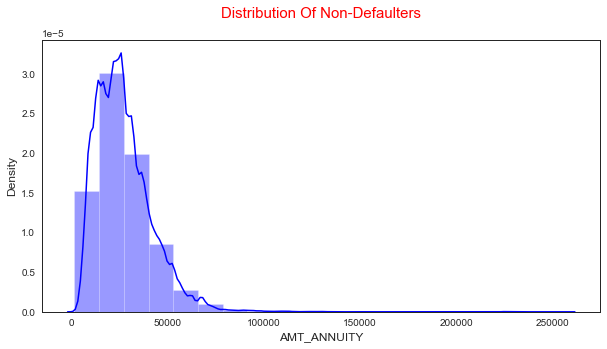

In [83]:
plt.figure(figsize=[10,5])

sns.set_style("white")
sns.distplot(New_df0["AMT_ANNUITY"], bins=20, color="blue")
plt.title("Distribution Of Non-Defaulters\n", fontsize=15, color="red")

**We can observe from both the plots that most of the clients are from first quartile than third quartile.**



**Goods Price**

C:\Users\Win-10\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



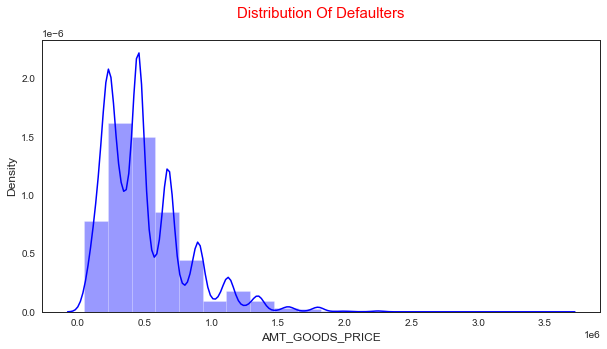

In [84]:
plt.figure(figsize=[10,5])

sns.set_style("white")
sns.distplot(New_df1["AMT_GOODS_PRICE"], bins=20, color="blue")
plt.title("Distribution Of Defaulters\n", fontsize=15, color="red")
plt.show()

C:\Users\Win-10\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



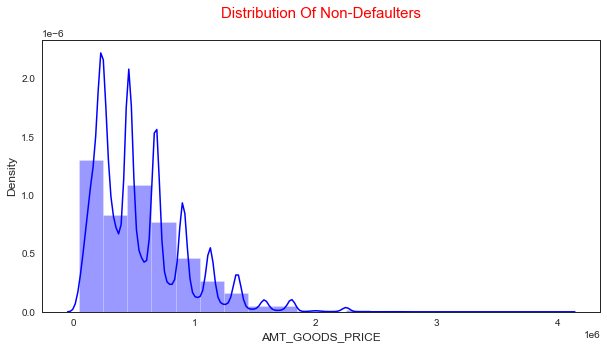

In [85]:
plt.figure(figsize=[10,5])

sns.set_style("white")
sns.distplot(New_df0["AMT_GOODS_PRICE"], bins=20, color="blue")
plt.title("Distribution Of Non-Defaulters\n", fontsize=15, color="red")
plt.show()

**We can observe from both the plots that most of the clients are from first quartile than third quartile.**


**Credit Amount**

C:\Users\Win-10\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



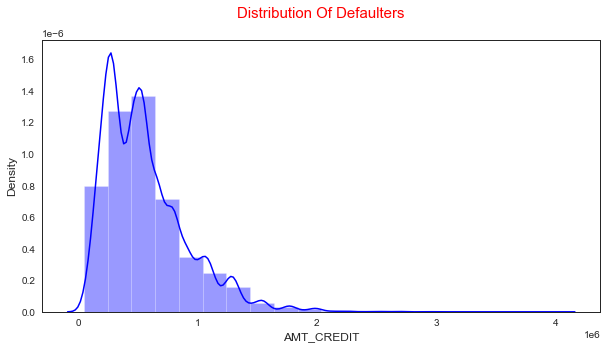

In [86]:
plt.figure(figsize=[10,5])

sns.set_style("white")
sns.distplot(New_df1["AMT_CREDIT"], bins=20, color="blue")
plt.title("Distribution Of Defaulters\n", fontsize=15, color="red")
plt.show()

C:\Users\Win-10\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



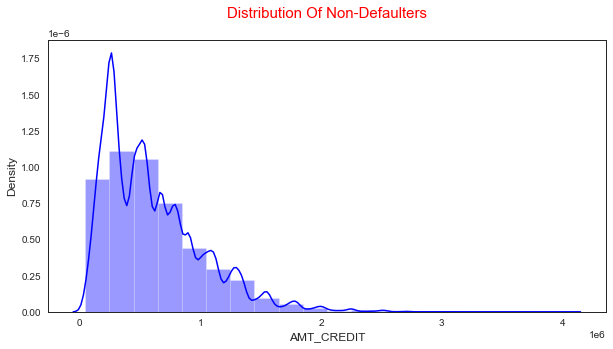

In [87]:
plt.figure(figsize=[10,5])

sns.set_style("white")
sns.distplot(New_df0["AMT_CREDIT"], bins=20, color="blue")
plt.title("Distribution Of Non-Defaulters\n", fontsize=15, color="red")
plt.show()

**We can observe from both the plots that most of the clients are from first quartile than third quartile.**


**Family Members**

C:\Users\Win-10\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



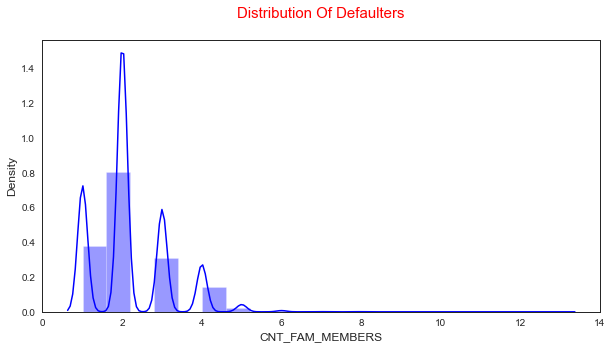

In [88]:
plt.figure(figsize=[10,5])

sns.set_style("white")
sns.distplot(New_df1["CNT_FAM_MEMBERS"], bins=20, color="blue")
plt.title("Distribution Of Defaulters\n", fontsize=15, color="red")
plt.show()

C:\Users\Win-10\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



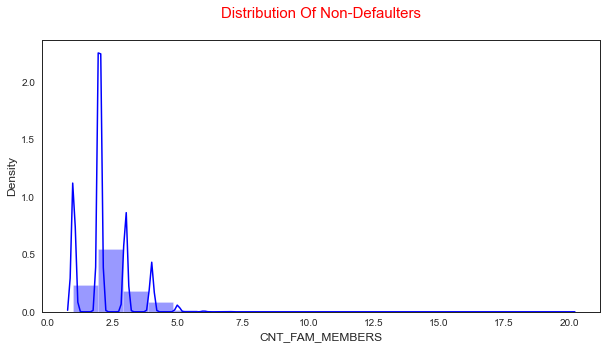

In [89]:
plt.figure(figsize=[10,5])
sns.set_style("white")
sns.distplot(New_df0["CNT_FAM_MEMBERS"], bins=20, color="blue")
plt.title("Distribution Of Non-Defaulters\n", fontsize=15, color="red")
plt.show()

**We can observe from both the plots that most of the clients are from first quartile than third quartile.**


**7. BIVARIATE ANALYSIS**
> 7.1 Numerical Vs Numerical

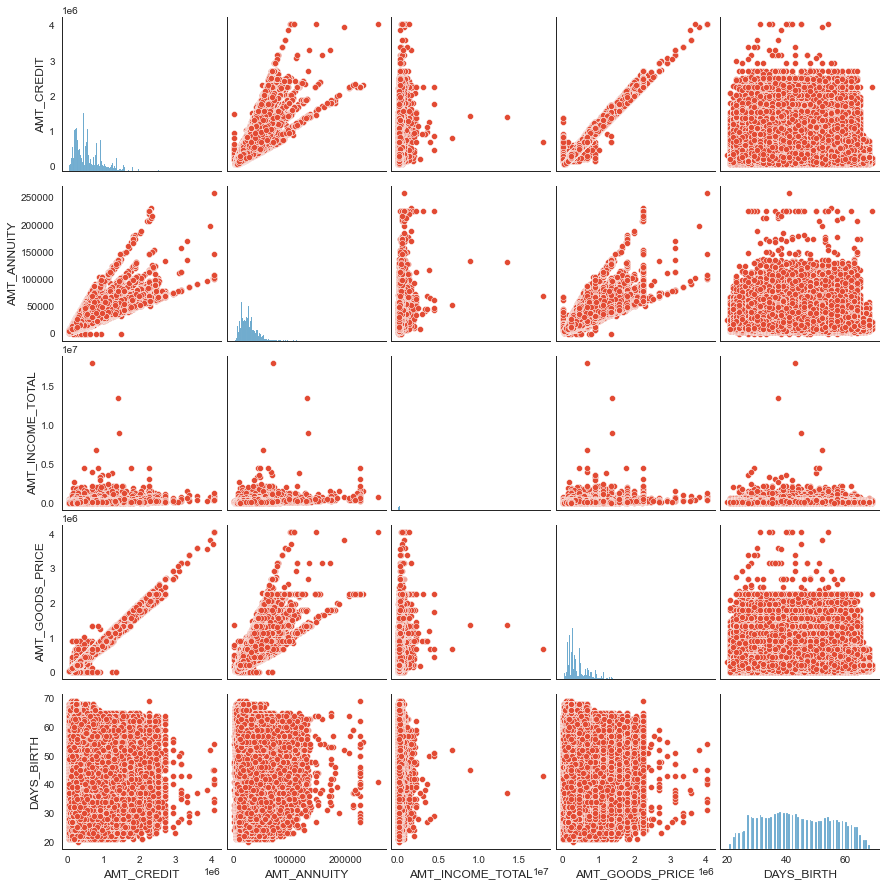

In [90]:
#Let's do bivariate analysis (num vs num) for Non-Defaulters
A = New_df0[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'DAYS_BIRTH']].fillna(0)
sns.pairplot(A)
plt.show()


**We can say by observing above pair plot for Non-Defaulters that the density in the lower left corner is similar in all the cases, so the people are equally likely to Non-Default if the AMT_INCOME_TOTALI is small and the AMT_CREDIT is low.**


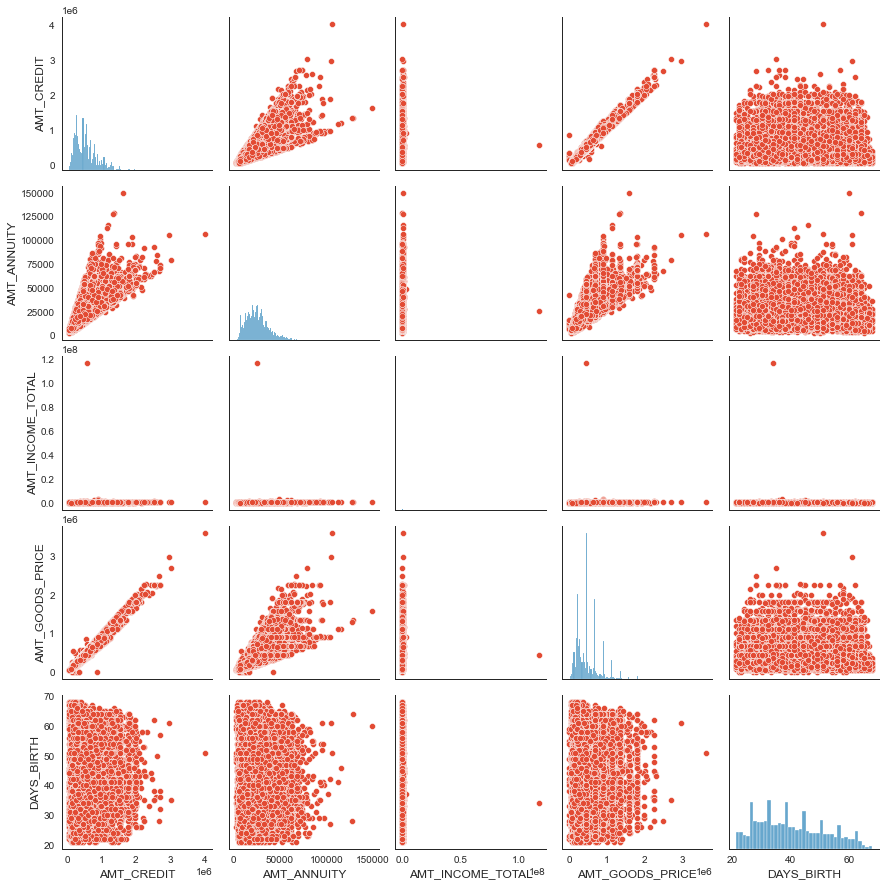

In [91]:
#Let's do bivariate analysis (num vs num) for Defaulters

B = New_df1[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'DAYS_BIRTH']].fillna(0)
sns.pairplot(B)
plt.show()


**We can say by observing above pair plot for Defaulters that the density in the lower left corner is almost similar in all the cases, so the people are equally likely to default if the AMT_INCOME is small also the AMT_CREDIT is low.**

> 7.2 Numerical Vs Categorical

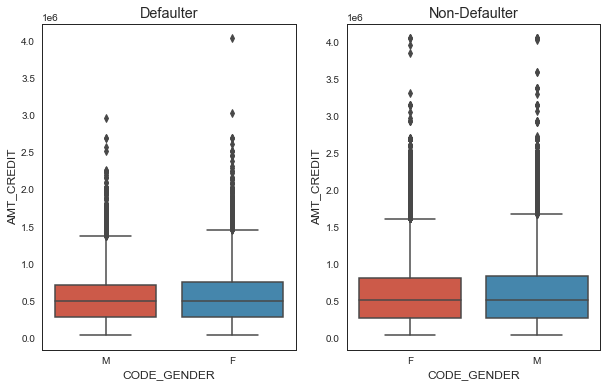

In [92]:
plt.figure(figsize=[10,6])

plt.subplot(1,2,1)
plt.title("Defaulter")
sns.boxplot(x="CODE_GENDER", y="AMT_CREDIT", data=New_df1)

plt.subplot(1,2,2)
plt.title("Non-Defaulter")
sns.boxplot(x="CODE_GENDER", y="AMT_CREDIT", data=New_df0)

plt.show()

**By comparing above two plots on the basis of Gender and Credit Amount, The % of Non-Defaulter is increase for both Male and Female as compare to % of Defaulter.**

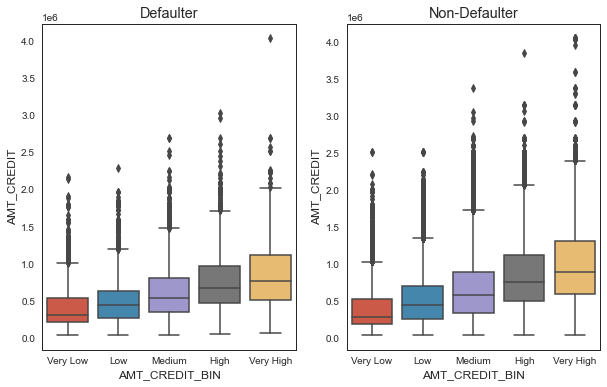

In [93]:
plt.figure(figsize=[10,6])

plt.subplot(1,2,1)
plt.title("Defaulter")
sns.boxplot(x="AMT_CREDIT_BIN", y="AMT_CREDIT", data=New_df1)

plt.subplot(1,2,2)
plt.title("Non-Defaulter")
sns.boxplot(x="AMT_CREDIT_BIN", y="AMT_CREDIT", data=New_df0)

plt.show()

**By comparing above two plots on the basis of Credit Amount Range and Credit Amount, The % of Non-Defaulter is increasing for all the Credit Amount Range as compare to % of Defaulter.**

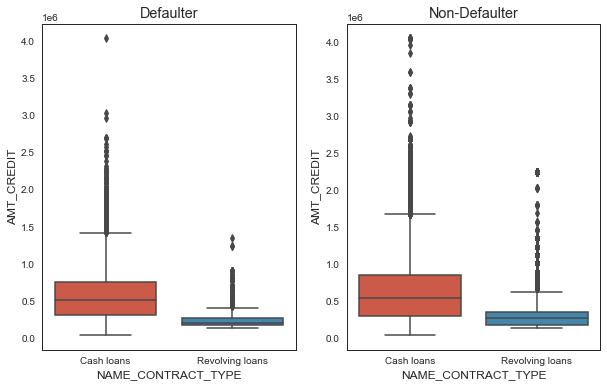

In [94]:
plt.figure(figsize=[10,6])

plt.subplot(1,2,1)
plt.title("Defaulter")
sns.boxplot(x="NAME_CONTRACT_TYPE", y="AMT_CREDIT", data=New_df1)

plt.subplot(1,2,2)
plt.title("Non-Defaulter")
sns.boxplot(x="NAME_CONTRACT_TYPE", y="AMT_CREDIT", data=New_df0)

plt.show()

**By comparing above two plots on the basis of Contract Type and Credit Amount, The % of Non-Defaulter increases for Cash Loan and Revolving Loan as compare to % of Defaulter.**

**8. MULTIVARIATE ANALYSIS**

In [95]:
res = pd.pivot_table(data=app_data_df, index='NAME_INCOME_TYPE', columns='AMT_INCOME_BIN', values='TARGET')
res

AMT_INCOME_BIN,Very Poor,Poor,Middle Class,Rich,Super Rich
NAME_INCOME_TYPE,,,,,
Businessman,NaN,NaN,0.000000,NaN,0.000000
Commercial associate,0.086502,0.083086,0.075718,0.063766,0.054183
Maternity leave,0.666667,0.000000,NaN,NaN,0.000000
Pensioner,0.051979,0.055265,0.056244,0.048501,0.052775
State servant,0.067449,0.064443,0.057989,0.041241,0.032573
Student,0.000000,0.000000,0.000000,NaN,0.000000
Unemployed,0.500000,0.250000,0.000000,0.000000,NaN
Working,0.101067,0.099922,0.095710,0.081160,0.070280


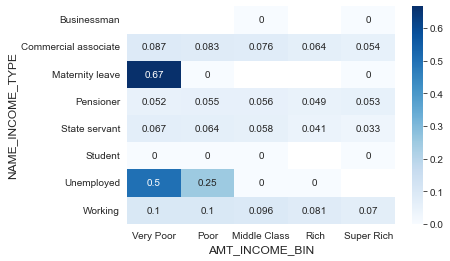

In [96]:
sns.heatmap(res, annot=True, cmap='Blues')
plt.show()

**By observing above heatmap we can say that there is a high correlation between Matrrnity leave income type and Poor income range**



**9.ANALYSIS ON PREVIOUS APPLICATION DATA**
> 9.1 Loading The Dataset

In [97]:
pre_app_df = pd.read_csv("previous_application.csv")
pre_app_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


> 9.2 Data Inspection

In [98]:
pre_app_data.shape

(1670214, 37)

In [99]:
pre_app_data.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [100]:
pre_app_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [101]:
pre_app_data.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [102]:
pre_app_data.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [103]:
(pre_app_data.isnull().mean()*100).sort_values(ascending = False)

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

**10. DEALING WITH NULL VALUES**

In [104]:
#Dropping columns with >50% Null values and keeping rest columns with <50% Null vlaues
PreAppData = pre_app_data.loc[:,pre_app_data.isnull().mean()<=0.5]
PreAppData.shape


(1670214, 33)

In [105]:
#Lets find the columns with <=13% Null values
list(pre_app_data.columns[(pre_app_data.isnull().mean()<=0.13) & (pre_app_data.isnull().mean()>0)])

['AMT_CREDIT', 'PRODUCT_COMBINATION']

**11. DEALING WITH COLUMN DATATYPES AND ERRORS**

In [27]:
# XNA and XAP are replaced by NaN
pre_app_data = pre_app_data.replace('XNA', np.NaN)
pre_app_data = pre_app_data.replace('XAP', np.NaN)


In [107]:
pre_app_data['NAME_CONTRACT_STATUS'].value_counts()

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

In [108]:
#Lets find The columns starting with 'DAYS'
Days_col = [col for col in pre_app_data if col.startswith('DAYS')]
Days_col

['DAYS_DECISION',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION']

In [109]:
#Lets Check the values present in columns starting with 'DAYS'
print(pre_app_data['DAYS_DECISION'].unique())
print(pre_app_data['DAYS_FIRST_DRAWING'].unique())
print(pre_app_data['DAYS_FIRST_DUE'].unique())
print(pre_app_data['DAYS_LAST_DUE_1ST_VERSION'].unique())
print(pre_app_data['DAYS_LAST_DUE'].unique())
print(pre_app_data['DAYS_TERMINATION'].unique())


[  -73  -164  -301 ... -1967 -2389    -1]
[ 3.65243e+05          nan -2.77000e+02 ... -1.61100e+03 -1.77000e+03
 -1.87900e+03]
[  -42.  -134.  -271. ... -2842. -1774. -2892.]
[ 300.  916.   59. ... 1878. 2016. 1760.]
[-4.20000e+01  3.65243e+05 -1.82000e+02 ... -2.86700e+03 -2.86600e+03
 -2.83300e+03]
[-3.70000e+01  3.65243e+05 -1.77000e+02 ... -2.82800e+03 -2.87000e+03
 -2.81500e+03]


In [110]:
#Let's make Days_col values positive
pre_app_data[Days_col] = abs(pre_app_data[Days_col])

In [111]:
print(pre_app_data['DAYS_DECISION'].unique())
print(pre_app_data['DAYS_FIRST_DRAWING'].unique())
print(pre_app_data['DAYS_FIRST_DUE'].unique())
print(pre_app_data['DAYS_LAST_DUE_1ST_VERSION'].unique())
print(pre_app_data['DAYS_LAST_DUE'].unique())
print(pre_app_data['DAYS_TERMINATION'].unique())

[  73  164  301 ... 1967 2389    1]
[3.65243e+05         nan 2.77000e+02 ... 1.61100e+03 1.77000e+03
 1.87900e+03]
[  42.  134.  271. ... 2842. 1774. 2892.]
[ 300.  916.   59. ... 2801. 2776. 2757.]
[4.20000e+01 3.65243e+05 1.82000e+02 ... 2.86700e+03 2.86600e+03
 2.83300e+03]
[3.70000e+01 3.65243e+05 1.77000e+02 ... 2.82800e+03 2.87000e+03
 2.81500e+03]


**12. ANALYSIS**

In [79]:
import plotly
from plotly import tools
import plotly.express as pex

**12.1 Reporting The Outliers**

C:\Users\Win-10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



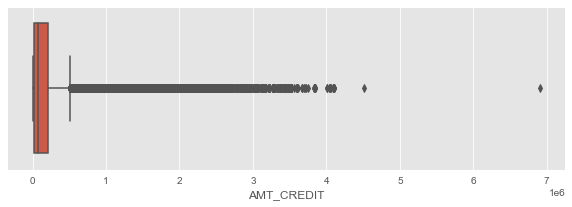

In [112]:
plt.style.use('ggplot')
plt.figure(figsize=[10,3])
sns.boxplot(pre_app_data["AMT_CREDIT"])
plt.show()

**The above boxplot showing the distribution of the Credit Amount of the clients, here we observe an outlier value below 7M**

C:\Users\Win-10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



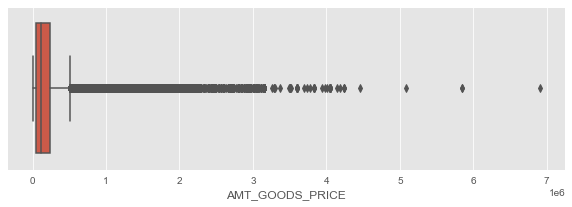

In [114]:
plt.style.use('ggplot')
plt.figure(figsize=[10,3])
sns.boxplot(pre_app_data["AMT_GOODS_PRICE"])
plt.show()

**The above boxplot showing the distribution of the Goods Price, here we observe an outlier between 5m to 7M**

C:\Users\Win-10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



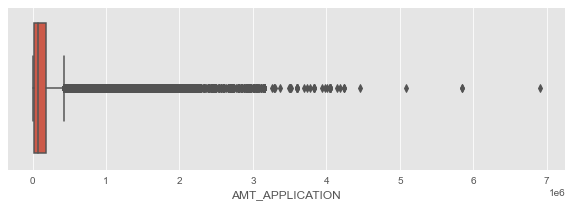

In [115]:
plt.style.use('ggplot')
plt.figure(figsize=[10,3])
sns.boxplot(pre_app_data["AMT_APPLICATION"])
plt.show()

**The above boxplot showing the distribution of the Application Amount, here we observe an outlier value above 5M and below 7M**

C:\Users\Win-10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



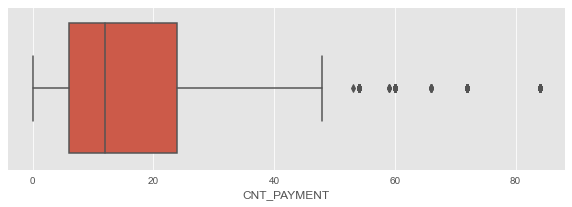

In [116]:
plt.style.use('ggplot')
plt.figure(figsize=[10,3])
sns.boxplot(pre_app_data["CNT_PAYMENT"])
plt.show()

**The above boxplot showing the distribution of the CNT Amount, here we observe an outlier above Upper Fence**

C:\Users\Win-10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



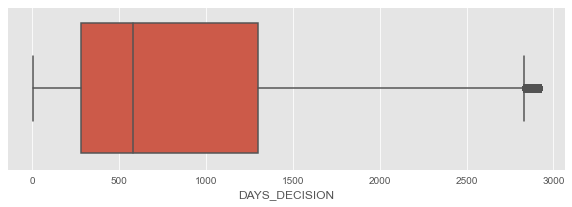

In [118]:
plt.style.use('ggplot')
plt.figure(figsize=[10,3])
sns.boxplot(pre_app_data["DAYS_DECISION"])
plt.show()

**The above boxplot showing the distribution of the Days Decision, here we observe no outliers**

**13. UNIVARIATE ANALYSIS**
> 13.1 Categorical Variables

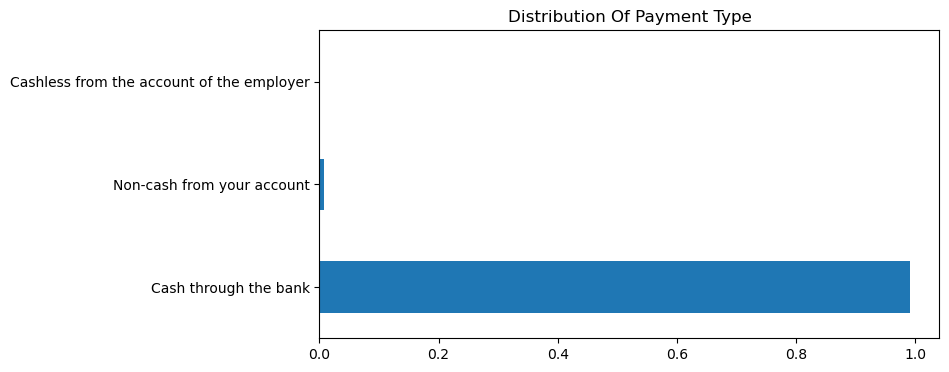

In [52]:
plt.figure(figsize=[8,4])
plt.style.use("default")
plt.title("Distribution Of Payment Type")
pre_app_data["NAME_PAYMENT_TYPE"].value_counts(normalize=True).plot.barh()

plt.show()

**By observing above horizontal bar plot, we can say that most of the people chose to pay cash through Bank**

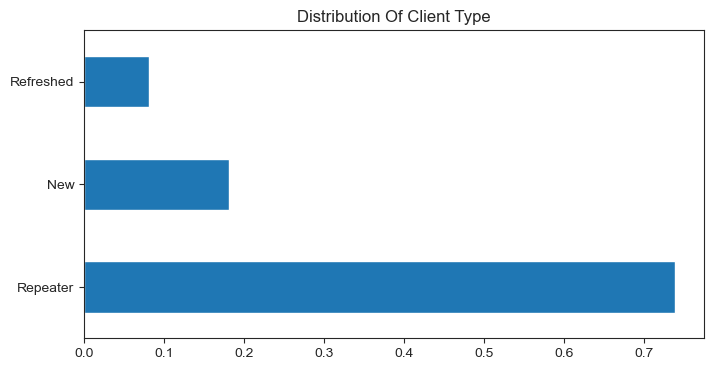

In [61]:
plt.figure(figsize=[8,4])
plt.title("Distribution Of Client Type")
pre_app_data["NAME_CLIENT_TYPE"].value_counts(normalize=True).plot.barh()

plt.show()

**By observing above horizontal bar plot, we can say that most of the client are Repeater type**

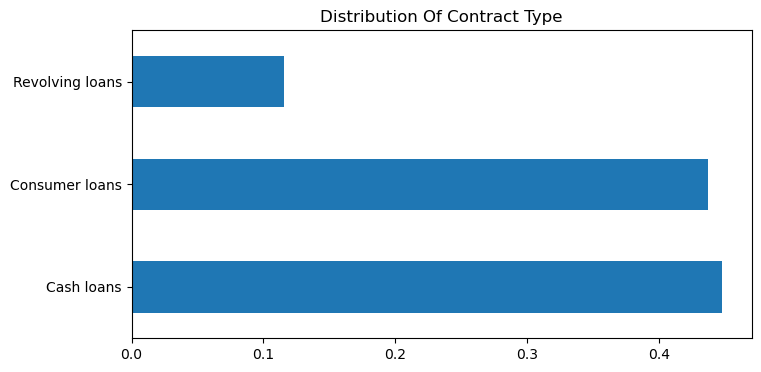

In [50]:
plt.figure(figsize=[8,4])
plt.title("Distribution Of Contract Type")
pre_app_data["NAME_CONTRACT_TYPE"].value_counts(normalize=True).plot.barh()

plt.show()

**By observing above horizontal bar plot, we can say that most of the people prefer Cash loans and Consumer loans**

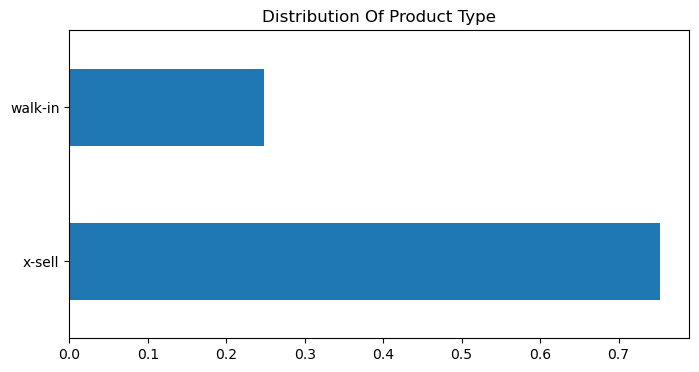

In [49]:
plt.figure(figsize=[8,4])
plt.title("Distribution Of Product Type")
pre_app_data["NAME_PRODUCT_TYPE"].value_counts(normalize=True).plot.barh()

plt.show()

**By observing above horizontal bar plot, we can say that most of the people chose x-sell product type**

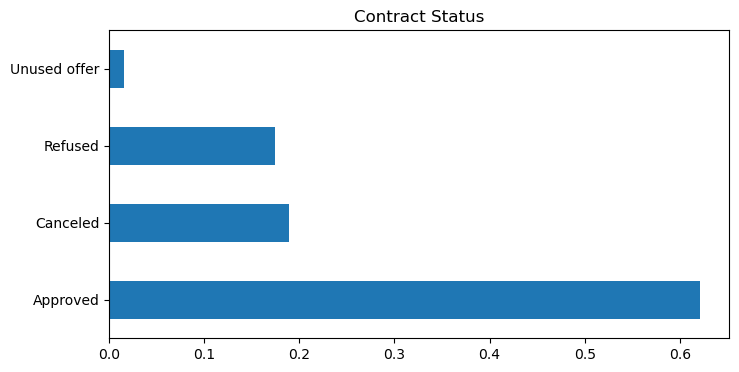

In [46]:
plt.figure(figsize=[8,4])
plt.title("Contract Status")
pre_app_data["NAME_CONTRACT_STATUS"].value_counts(normalize=True).plot.barh()
plt.show()

**By observing above horizontal bar plot, we can say that majority of the loans are approved**

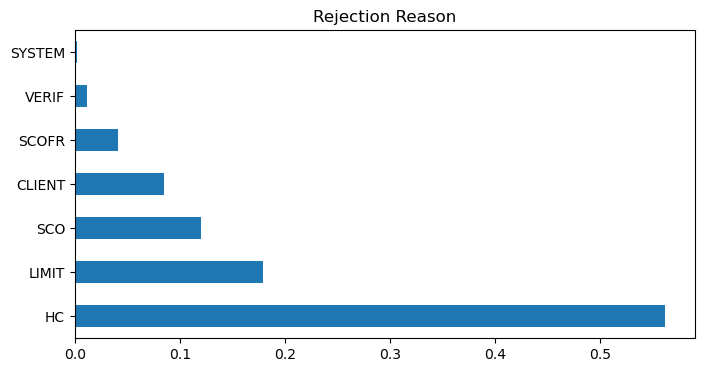

In [48]:
plt.figure(figsize=[8,4])
plt.title("Rejection Reason")
pre_app_data["CODE_REJECT_REASON"].value_counts(normalize=True).plot.barh()
plt.show()

**By observing above horizontal bar plot, we can say that major reason for loan rejection is HC**

> 13.2 Numerical Variables

C:\Users\Win-10\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Distribution Of Credit Amount\n')

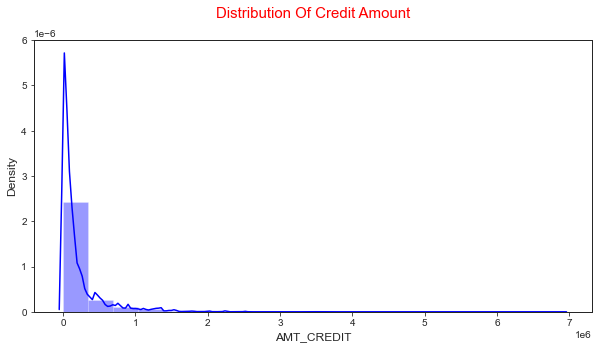

In [25]:
plt.figure(figsize=[10,5])

sns.set_style("ticks")
sns.distplot(pre_app_data["AMT_CREDIT"], bins=20, color="blue")
plt.title("Distribution Of Credit Amount\n", fontsize=15, color="red")

**We can observe from the above plot that most of the clients are from first quartile than third quartile.
& there are some outliers and the curve is not a bell curve**



C:\Users\Win-10\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Distribution Of Loan Annuity\n')

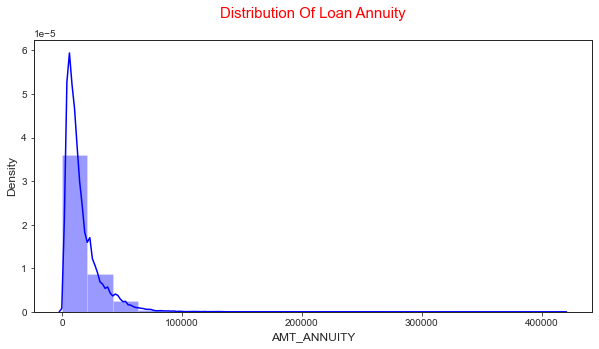

In [22]:
plt.figure(figsize=[10,5])

sns.set_style("ticks")
sns.distplot(pre_app_data["AMT_ANNUITY"], bins=20, color="blue")
plt.title("Distribution Of Loan Annuity\n", fontsize=15, color="red")

**We can observe from the above plot that most of the clients are from first quartile than third quartile.
& there are some outliers and the curve is not a bell curve**


C:\Users\Win-10\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Distribution Of Good Price\n')

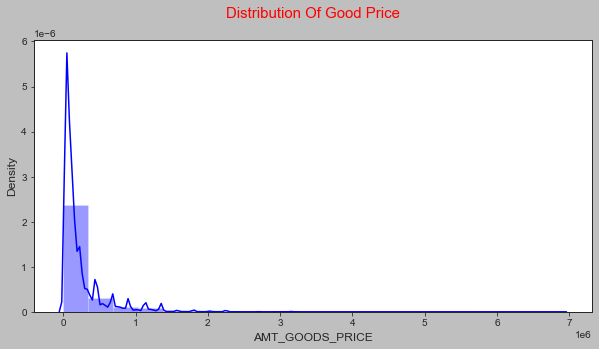

In [19]:
plt.figure(figsize=[10,5])

sns.set_style("ticks")
sns.distplot(pre_app_data["AMT_GOODS_PRICE"], bins=20, color="blue")
plt.title("Distribution Of Good Price\n", fontsize=15, color="red")

**We can observe from the above plot that most of the clients are from first quartile,
there are some outliers and the curve is not a bell curve**


C:\Users\Win-10\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Distribution Of Application Amount\n')

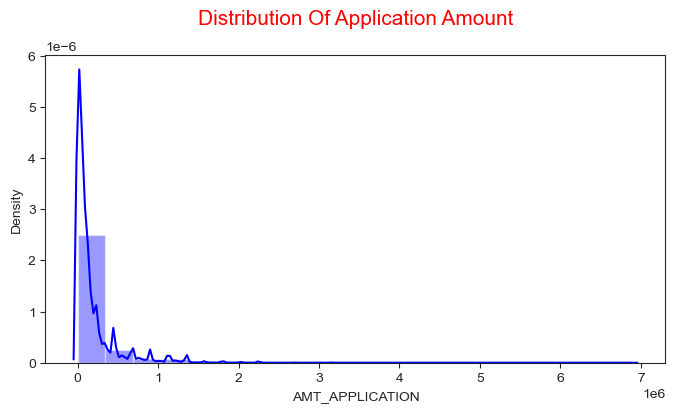

In [54]:
plt.figure(figsize=[8,4])

sns.set_style("ticks")
sns.distplot(pre_app_data["AMT_APPLICATION"], bins=20, color="blue")
plt.title("Distribution Of Application Amount\n", fontsize=15, color="red")

**We can observe from the above plot that most of the clients are from first quartile,
there are some outliers and the curve is not a normal curve.**


**14. BIVARIATE ANALYSIS**
> 14.1 Numerical Vs Numerical

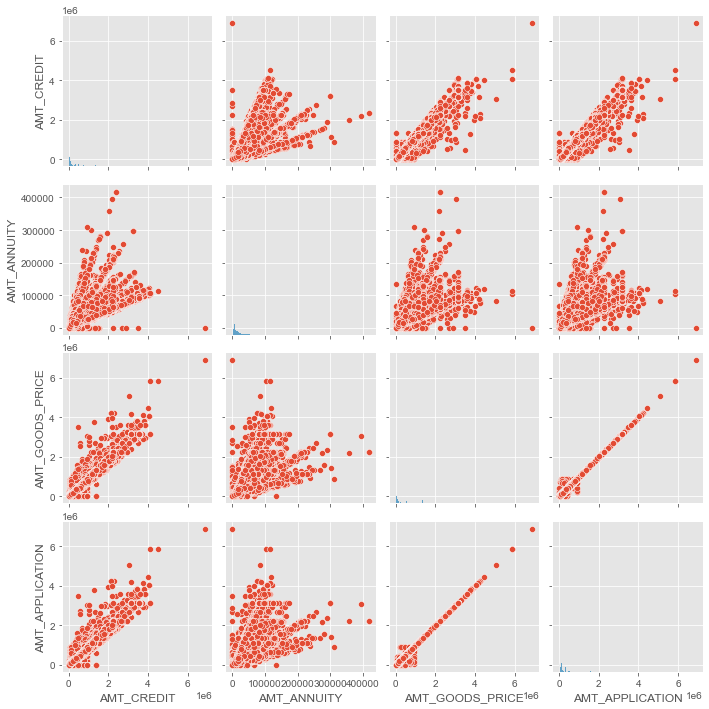

In [33]:
plt.style.use("ggplot")
C = pre_app_data[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'AMT_APPLICATION']].fillna(0)
sns.pairplot(C)
plt.show()

**We can observe from above pair plot that Increase of annuity increases Credit amount and Goods Price for the Previous application Data**

> 14.2 Categorical Vs Numerical

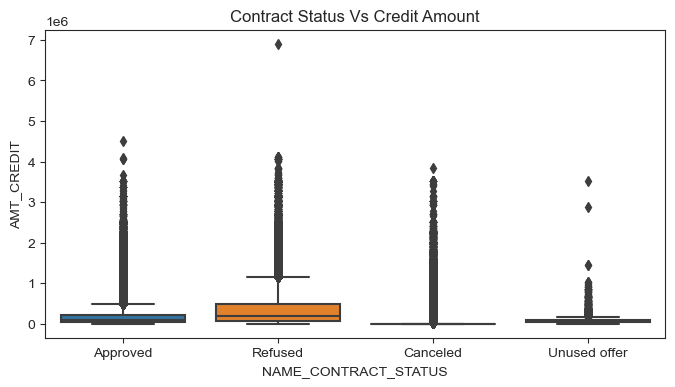

In [58]:
plt.figure(figsize=[8,4])

plt.title("Contract Status Vs Credit Amount")
sns.boxplot(x="NAME_CONTRACT_STATUS", y="AMT_CREDIT", data=pre_app_data)
plt.show()

**We can observe from above boxplot that if Credit amount is low the application may get canceled/Unused** 

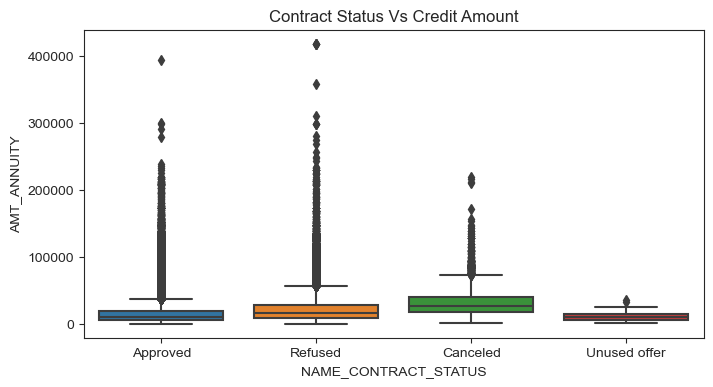

In [59]:
plt.figure(figsize=[8,4])

plt.title("Contract Status Vs Credit Amount")
sns.boxplot(x="NAME_CONTRACT_STATUS", y="AMT_ANNUITY", data=pre_app_data)
plt.show()

**We can observe from above boxplot that if ANnnuity amount is low is low the application may get canceled/Unused and if amount is high application get Approved or sometime Refused** 

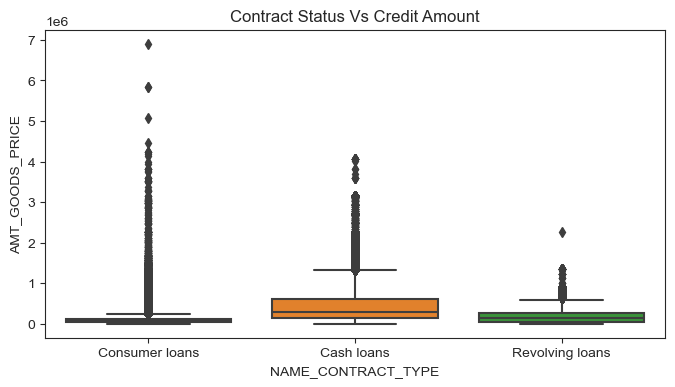

In [60]:
plt.figure(figsize=[8,4])

plt.title("Contract Status Vs Credit Amount")
sns.boxplot(x="NAME_CONTRACT_TYPE", y="AMT_GOODS_PRICE", data=pre_app_data)
plt.show()

**We can observe from above boxplot that the loan contact type is Revolving loan if Goods Price is low and if Goods price is high then loan contract type is Consumer loans** 

**15.MULTIVARIATE ANALYSIS**

In [75]:
#Let's Binning AMT_GOODS_PRICE based on quantiles
pre_app_data["AMT_GOODS_PRICE_BIN"] = pd.qcut(app_data_df.AMT_GOODS_PRICE, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['Very Low', 'Low', "Medium", 'High', 'Very High'])
pre_app_data["AMT_GOODS_PRICE_BIN"].head(10)

0          Low
1         High
2     Very Low
3          Low
4       Medium
5       Medium
6    Very High
7    Very High
8         High
9          Low
Name: AMT_GOODS_PRICE_BIN, dtype: category
Categories (5, object): ['Very Low' < 'Low' < 'Medium' < 'High' < 'Very High']

In [80]:
res = pd.pivot_table(data=pre_app_data, index="NAME_CONTRACT_TYPE", columns= "AMT_GOODS_PRICE_BIN", values= "SK_ID_PREV")

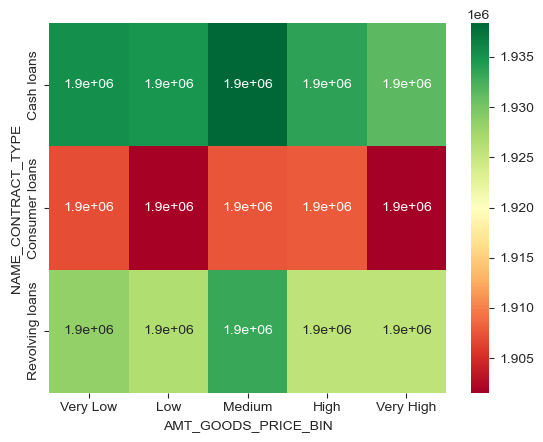

In [81]:
sns.heatmap(res, annot=True, cmap='RdYlGn')
plt.show()


**By observing above heatmap we can say that there is a high correlation between Medium Goods Price Range and Cash Loan.**

**16 MERGING TWO DATA SETS**
> Current Application Data & Previous Application Data

In [66]:
#Selecting columns from the Current Application Data
NewData = app_data_df[['SK_ID_CURR','TARGET']]
NewData

,SK_ID_CURR,TARGET
0,100002,1
1,100003,0
2,100004,0
3,100006,0
4,100007,0
...,...,...
307506,456251,0
307507,456252,0
307508,456253,0
307509,456254,1


In [69]:
#Let's merge NewData and Previous Application Data
Data_merge = NewData.merge(pre_app_data, on="SK_ID_CURR", how="inner")
Data_merge.head()

,SK_ID_CURR,TARGET,SK_ID_PREV,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,AMT_GOODS_PRICE_BIN
0,100002,1,1038818,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9,Y,1,0.000000,NaN,NaN,NaN,Approved,-606,NaN,NaN,NaN,New,Vehicles,POS,NaN,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0,Medium
1,100003,0,1810518,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12,Y,1,NaN,NaN,NaN,NaN,Approved,-746,NaN,NaN,Unaccompanied,Repeater,NaN,Cash,x-sell,Credit and cash offices,-1,NaN,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0,High
2,100003,0,2636178,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17,Y,1,0.000000,NaN,NaN,NaN,Approved,-828,Cash through the bank,NaN,Family,Refreshed,Furniture,POS,NaN,Stone,1400,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0,High
3,100003,0,2396755,Consumer loans,6737.310,68809.5,68053.5,6885.0,68809.5,SATURDAY,15,Y,1,0.100061,NaN,NaN,NaN,Approved,-2341,Cash through the bank,NaN,Family,Refreshed,Consumer Electronics,POS,NaN,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0,Low
4,100004,0,1564014,Consumer loans,5357.250,24282.0,20106.0,4860.0,24282.0,FRIDAY,5,Y,1,0.212008,NaN,NaN,NaN,Approved,-815,Cash through the bank,NaN,Unaccompanied,New,Mobile,POS,NaN,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0,Very Low


In [70]:
Data_merge.shape

(1413701, 39)

In [71]:
Data_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 39 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1413701 non-null  int64   
 1   TARGET                       1413701 non-null  int64   
 2   SK_ID_PREV                   1413701 non-null  int64   
 3   NAME_CONTRACT_TYPE           1413388 non-null  object  
 4   AMT_ANNUITY                  1106483 non-null  float64 
 5   AMT_APPLICATION              1413701 non-null  float64 
 6   AMT_CREDIT                   1413700 non-null  float64 
 7   AMT_DOWN_PAYMENT             664161 non-null   float64 
 8   AMT_GOODS_PRICE              1094176 non-null  float64 
 9   WEEKDAY_APPR_PROCESS_START   1413701 non-null  object  
 10  HOUR_APPR_PROCESS_START      1413701 non-null  int64   
 11  FLAG_LAST_APPL_PER_CONTRACT  1413701 non-null  object  
 12  NFLAG_LAST_APPL_IN_DAY      

In [74]:
Data_merge.describe()

,SK_ID_CURR,TARGET,SK_ID_PREV,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.413701e+06,1.413701e+06,1.413701e+06,1.106483e+06,1.413701e+06,1.413700e+06,6.641610e+05,1.094176e+06,1.413701e+06,1.413701e+06,664161.000000,4791.000000,4791.000000,1.413701e+06,1.413701e+06,1.106488e+06,852595.000000,852595.000000,852595.000000,852595.000000,852595.000000,852595.000000
mean,2.784813e+05,8.655296e-02,1.922744e+06,1.583718e+04,1.752436e+05,1.963541e+05,6.655317e+03,2.264512e+05,1.247893e+01,9.964321e-01,0.080175,0.189436,0.771284,-8.803670e+02,3.149878e+02,1.605194e+01,342257.656710,13488.741567,33274.831806,76665.634755,82353.171672,0.330572
std,1.028118e+05,2.811789e-01,5.327153e+05,1.472491e+04,2.936222e+05,3.194813e+05,2.062030e+04,3.159376e+05,3.331474e+00,5.962560e-02,0.107784,0.090849,0.100644,7.835402e+02,7.695082e+03,1.456675e+01,88832.266598,71650.147146,106161.775933,149704.716371,153537.064274,0.470419
min,1.000020e+05,0.000000e+00,1.000001e+06,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.893640e+05,0.000000e+00,1.461346e+06,6.257858e+03,1.975050e+04,2.488050e+04,0.000000e+00,4.982850e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.313000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1630.000000,-1244.000000,-1316.000000,-1269.000000,0.000000
50%,2.789920e+05,0.000000e+00,1.922698e+06,1.122376e+04,7.087050e+04,8.059500e+04,1.791000e+03,1.102455e+05,1.200000e+01,1.000000e+00,0.062489,0.189136,0.835095,-5.820000e+02,4.000000e+00,1.200000e+01,365243.000000,-825.000000,-358.000000,-534.000000,-494.000000,0.000000
75%,3.675560e+05,0.000000e+00,2.384012e+06,2.042078e+04,1.800000e+05,2.156400e+05,7.695000e+03,2.295000e+05,1.500000e+01,1.000000e+00,0.108912,0.193330,0.852537,-2.710000e+02,8.500000e+01,2.400000e+01,365243.000000,-408.000000,135.000000,-73.000000,-42.000000,1.000000
max,4.562550e+05,1.000000e+00,2.845381e+06,4.180581e+05,5.850000e+06,4.509688e+06,3.060045e+06,5.850000e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


**CONCLUSIONS :**

**EDA on data set revealed that :**
**1) The proportion of Defaulters is 8%.**
**2) Bank majorly provide loan to Females.**
**3) Bank should provide more Revolving Loans.**
**4) Proportions of Defaulters for Working is high.**
**5) Higher educated people default less.**
**6) Proportion of Defaulters for those who lives in Rented apartment is less.**
**7) Married people default more.**
**8) Cash loans have high defaulters, Bank should provide more Revolving Loans.**
**9) Old-age people are safer as they are less default less, middle age people default more.**